In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Introducción**
Python es un lenguaje de programación interpretado, pero es lento a comparación del lenguaje de programación C que es compilado. Para resolver este problema se puede traducir el código Python a C y compilándolo con Cython y así obtener de esta forma considerables mejoras del rendimiento. En problema se explicará cómo se puede incrementar el rendimiento de Python con Cython.  

#**Desarrollo**
Para comprobar cuánto puede mejorar el rendimiento del código Python al utilizar Cython, se utilizó el problema Planeta en Orbita, los valores de la masa y velocidad del planeta Tierra fueron extraídos de Wikipedia. 

En primera instancia se realizó una batería de experimentos, para controlar el ruido gaussiano, se realizó 20 veces el experimento, para esto se realizó diferentes cargas de experimentos. Para saber cuánto puede aumentar el rendimiento de Python cuando se utiliza Cython solamente se tiene que comparar el tiempo que tarda en ejecutarse en ambos lenguajes de programación
- *Carga 1:* Nsteps = 2000000 
- *Carga 2:* Nsteps = 4000000 
- *Carga 3:* Nsteps = 6000000 

In [98]:
data1 = pd.read_csv("/content/planeta.csv")
data2 = pd.read_csv("/content/planeta2.csv")
data3 = pd.read_csv("/content/planeta3.csv")

- Promedio del tiempo de ejecución de cada carga en python

In [99]:
mean_py1 = data1['py'].mean()
mean_py1

1.85779

In [100]:
mean_py2 = data2['py'].mean()
mean_py2

3.5489850000000005

In [102]:
mean_py3 = data3['py'].mean()
mean_py3

5.8065705

- Promedio del tiempo de ejecución de cada carga en cython

In [103]:
mean_cy1 = data1['cy'].mean()
mean_cy1

0.09467850000000001

In [104]:
mean_cy2 = data2['cy'].mean()
mean_cy2

0.1893265

In [105]:
mean_cy3 = data3['cy'].mean()
mean_cy3

0.2845825

- Se compararon los diferentes cargas en función del tiempo de ejecución a través de un gráfico de barras 

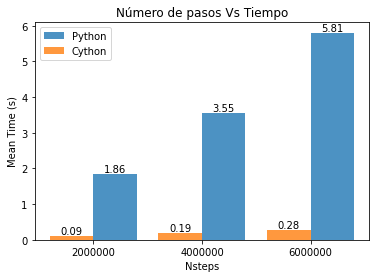

In [138]:
x_axis = np.arange(len([mean_py1,mean_py2,mean_py3]))
plt.bar(x_axis + 0.2,[mean_py1,mean_py2,mean_py3], 0.4, label = 'Python', alpha=0.8)
plt.bar(x_axis - 0.2,[mean_cy1,mean_cy2,mean_cy3], 0.4, label = 'Cython', alpha=0.8)
plt.xticks(x_axis,['2000000','4000000','6000000'])
plt.xlabel('Nsteps')
plt.ylabel('Mean Time (s)')
plt.title('Número de pasos Vs Tiempo')
plt.legend()
def addlabels(x, y, val):
    for i in range(len(x)):
        plt.text(i + val , y[i] + 0.05, round(y[i],2), ha = 'center')

addlabels(['2000000','4000000','6000000'], [mean_py1,mean_py2,mean_py3], + 0.2)
addlabels(['2000000','4000000','6000000'], [mean_cy1,mean_cy2,mean_cy3], - 0.2)
plt.show()

- Se compararon los diferentes cargas en función del tiempo de ejecución a través de un gráfico, para asi evidenciar el rendimiento que ofrece Cython 

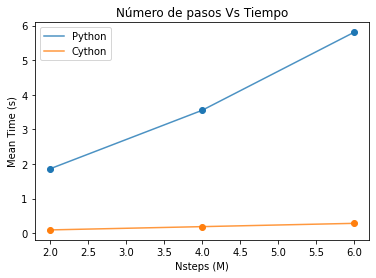

In [141]:
plt.plot([2,4,6],[mean_py1,mean_py2,mean_py3], label = 'Python', alpha=0.8)
plt.scatter([2,4,6],[mean_py1,mean_py2,mean_py3])

plt.plot([2,4,6],[mean_cy1,mean_cy2,mean_cy3],label = 'Cython', alpha=0.8)
plt.scatter([2,4,6],[mean_cy1,mean_cy2,mean_cy3])
plt.xlabel('Nsteps (M)')
plt.ylabel('Mean Time (s)')
plt.title('Número de pasos Vs Tiempo')
plt.legend()
plt.show()

#**Conclusiones**
- Se evidencia en las graficas que Cython es mucho más rapido que Python, Cython ofrece poder aumentar el rendimiento de Python considerablemente.
- Una de las ventajas de Cython es que al mezclar el lenguaje de programación C con Python, es que el codigo se puede ejecutar casi a la velocidad de C con ajustar varias funciones como las declaracionesde, que pueden ser de tres formas: *def, cpdef y cdef*
- Al poder utilizar librerias del lenguaje de C en Cython, se puede llegar a paralelizar procesos y asi aumentar el rendimiento, todo esto se podria con la ayuda de OpenMP.
- Cython facilita funcionalidades del lenguaje C, que poseen menos sobrecarga que las funcionalidades de Python una vez que se las llama y, por consiguiente, se ejecutan más rapido.
